In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [69]:
data = r"clean_cad.csv"
clean_data = pd.read_csv(data)
clean_data["Call Time"] = pd.to_datetime(clean_data["Call Time"], errors='coerce')
clean_data

,Unnamed: 0,Call Time,Reason for Dispatch,Call Sign,2 Call Sign,Disposition
0,0,2016-01-01 00:00:04,ASSAULT,5E57,5E57,ADVISED
1,1,2016-01-01 00:00:04,ASSAULT,5E57,4X40,ADVISED
2,2,2016-01-01 00:00:04,ASSAULT,5E57,4E53,ADVISED
3,3,2016-01-01 00:00:24,TRAFFIC STOP,5T81,5T81,ADVISED
4,4,2016-01-01 00:02:45,CHECK WELFARE,3X90,3F61,ASSISTED
...,...,...,...,...,...,...
1616824,1616824,2023-12-31 23:23:05,CRIMINAL TRESPASS,NaN,NaN,DISREGARD
1616825,1616825,2023-12-31 23:26:00,AUDIBLE ALARM,NaN,NaN,INFORMATION ONLY
1616826,1616826,2023-12-31 23:32:06,SUSPICIOUS CONDITIONS,NaN,NaN,QUALITY OF LIFE - NO DISPATCH
1616827,1616827,2023-12-31 23:33:30,SHOTS FIRED,NaN,NaN,REFERRED TO OTHER AGENCY


In [70]:
def time_filter_year(table: pd.DataFrame, start_time: int, end_time: int):
    """Filters the call time column of the data. Based off year"""
    filtered_table = table[(table["Call Time"].dt.year >= start_time) & (table["Call Time"].dt.year < end_time)]
    return filtered_table

def time_filter_month(table: pd.DataFrame, start_year: int, start_month: int, end_year: int, end_month: int):
    """Filters the 'Call Time' column of the data based on month and year."""
    # Creating a mask to filter data between two datetime boundaries
    start_date = pd.Timestamp(year=start_year, month=start_month, day=1)
    if end_month == 12:
        end_date = pd.Timestamp(year=end_year + 1, month=1, day=1)
    else:
        end_date = pd.Timestamp(year=end_year, month=end_month + 1, day=1)

    filtered_table = table[(table["Call Time"] >= start_date) & (table["Call Time"] < end_date)]
    return filtered_table

In [71]:
def percent_cahoots_calls(df: pd.DataFrame, cahoot_call_signs: list):
    count_cahoots = 0
    for sign in cahoot_call_signs:
        count_cahoots += len(df[(df["Call Sign"] == sign) | (df["2 Call Sign"] == sign)])
    return (count_cahoots / len(df)) * 100

In [72]:
def filter_incidents(df: pd.DataFrame, column_name, incidents: list) -> pd.DataFrame:
    for i in incidents:
        df = df[df[column_name] != i]
    return df

In [73]:
cahoots_call_signs = ["1J77", "3J78", "4J79"]
excluded_incidents = ["TRANSPORT", "TRANSPORT, CAHOOTS"]
excluded_dispositions = ['DISREGARD', 'DISREGARDED BY DISPATCH',
                         'WILL CALL BACK', 'INFORMATION ONLY', 'UNABLE TO DISPATCH',
                         'REFERRED TO OTHER AGENCY', 'DISREGARDED BY PATROL SUPERVISOR',
                         'CALLER CALLED BACK', 'ACCIDENTALLY CHOSE NEW EVENT',
                         'UNABLE TO LOCATE', 'QUALITY OF LIFE - NO DISPATCH',
                         'RELAYED TO UNIVERSITY OF OREGON POLICE', 'FIX-IT TICKET',
                         'RELAYED TO LANE COUNTY SHERIFFS OFFICE', 'CANCEL WHILE ENROUTE']

In [74]:
clean_data = filter_incidents(clean_data, "Disposition", excluded_dispositions)

In [75]:
def calc_monthly_percentages(clean_data: pd.DataFrame, call_signs: list) -> pd.DataFrame:
    percentages = [ ]
    times = [ ]
    for year in range(2016, 2024):
        for month in range(1, 13):  # Months from January (1) to December (12)
            next_month = month + 1 if month < 12 else 1
            next_year = year if month < 12 else year + 1
            month_table = time_filter_month(clean_data, year, month, next_year, next_month)
            percent = percent_cahoots_calls(month_table, call_signs)
            percentages.append(percent)
            times.append(datetime(year=year, month=month, day=1))
            # print(f"In {year}-{month}, Cahoots handled {percent:.2f}% of the total calls")
    return pd.DataFrame({"Time": times, "Percentage": percentages})

results_table = calc_monthly_percentages(clean_data, cahoots_call_signs)

In [76]:
#Manually Finding the first occurrance of each call sign

target_call_signs = ["1J77", "3J78", "4J79"]

filtered_call_signs = clean_data[clean_data['Call Sign'].isin(target_call_signs)]

first_occurrence_call_sign = filtered_call_signs.groupby('Call Sign')['Call Time'].min()
first_1J77 = first_occurrence_call_sign['1J77']
first_3J78 = first_occurrence_call_sign['3J78']
first_4J79 = first_occurrence_call_sign['4J79']

last_occurrence = filtered_call_signs.groupby('Call Sign')['Call Time'].max()
last_1J77 = last_occurrence['1J77']
last_3J78 = last_occurrence['3J78']
last_4J79 = last_occurrence['4J79']

# print(f"First 1J77: {first_1J77}\n"
#       f"First 3J78: {first_3J78}\n"
#       f"First 4J79: {first_4J79}\n")
# 
# print(f"Last 1J77: {last_1J77}\n"
#       f"Last 3J78: {last_3J78}\n"
#       f"Last 4J79: {last_4J79}\n")

times_1J77 = {
    "First": first_1J77,
    "Last": last_1J77
}
times_3J78 = {
    "First": first_3J78,
    "Last": last_3J78
}
times_4J79 = {
    "First": first_4J79,
    "Last": last_4J79
}
call_sign_times = {
    "3J78": times_3J78,
    "1J77": times_1J77,
    "4J79": times_4J79
}


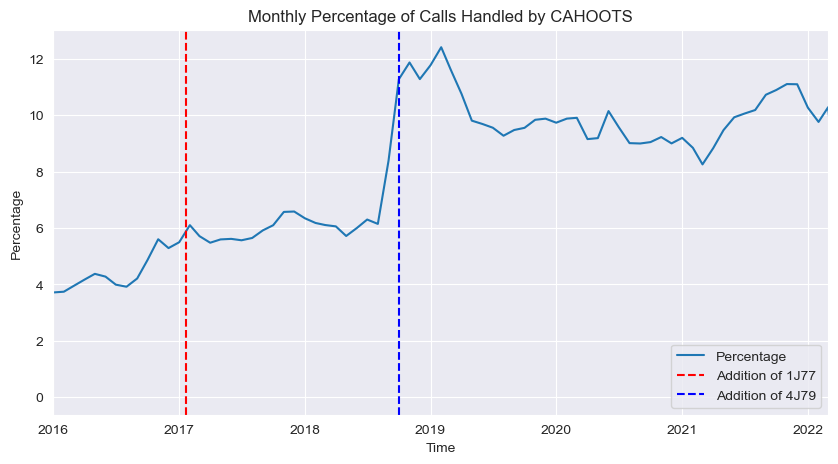

In [98]:
plt.figure(figsize=(10, 5))  
plt.plot(results_table['Time'], results_table['Percentage'], label="Percentage")  
plt.title('Monthly Percentage of Calls Handled by CAHOOTS') 
plt.xlabel('Time')  
plt.ylabel('Percentage')  
plt.grid(True)  

plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of 4J79', color='b', linestyle='--')

plt.legend(loc="lower right")

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

Dig deeper into uptick in 2018. Added 2nd van? Less total police calls, increase in cahoots calls, or both?
Stick with 2022 data cutoff. 

In [78]:
results_1_shift = calc_monthly_percentages(clean_data, ["3J78"])
results_2_shift = calc_monthly_percentages(clean_data, ["3J78", "1J77"])
results_3_shift = calc_monthly_percentages(clean_data, ["3J78", "1J77", "4J79"])

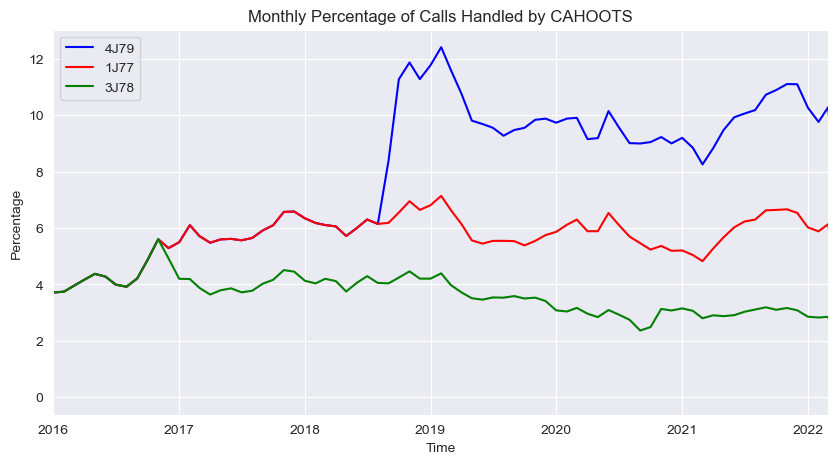

In [79]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(results_3_shift['Time'], results_3_shift['Percentage'], color='b', label="4J79")
plt.plot(results_2_shift['Time'], results_2_shift['Percentage'], color='r', label="1J77")
plt.plot(results_1_shift['Time'], results_1_shift['Percentage'], color='g', label="3J78")

plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc="upper left")


plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

Claims that 1J77 was added on 01-01-2017, I predict there was a slow ramp up (increase in capacity and hiring before adding another shift) 

In [80]:
results_3J78 = calc_monthly_percentages(clean_data, ["3J78"])
results_1J77 = calc_monthly_percentages(clean_data, ["1J77"])
results_4J79 = calc_monthly_percentages(clean_data, ["4J79"])

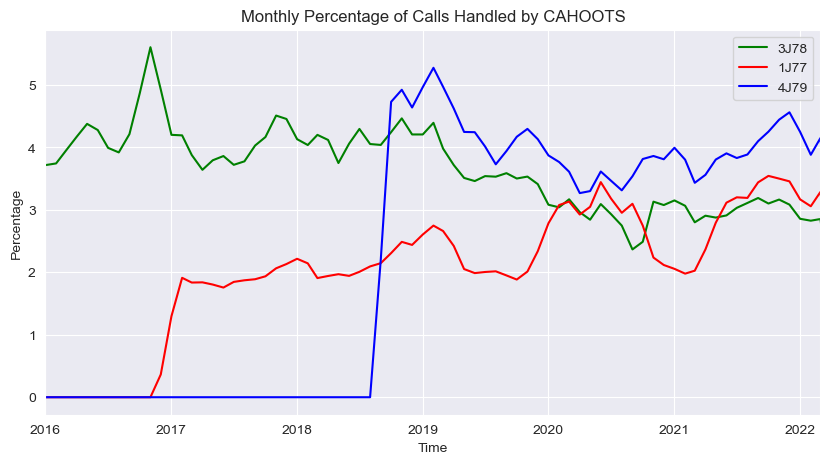

In [81]:

plt.figure(figsize=(10, 5))  # Set the figure size
    
plt.plot(results_3J78['Time'], results_3J78['Percentage'], label="3J78", color='g')
plt.plot(results_1J77['Time'], results_1J77['Percentage'], label="1J77", color='r')
plt.plot(results_4J79['Time'], results_4J79['Percentage'], label="4J79", color='b')
    
plt.title('Monthly Percentage of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Percentage')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')
    
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
    
plt.show()

## Observations from graph:
- Spike in 3J78 before 5-10 AM service hours were added. Why?
    - Possible ramp up in hiring before added hours?
    - Upgrades to handle longer van hours?
    - Started experimenting with shift before officially implementing it?
    - Going to look at same graph with count and see if it is similar.
    - If you're reading this and have any ideas please let me know!!
- 5 - 10 AM shift does handle fewer calls, in the beginning, however they balance out. Why?
- New van handles 1.35% more calls on average than older one. Is it faster? More comfortable? Better equipment? In all actuality though what changed to make it so consistently more efficient?
- Expected drop in 2020 (Covid) 


In [82]:
def average_in_time_range(table, start_time, end_time):
    start_time = pd.to_datetime(start_time)
    end_time = pd.to_datetime(end_time)
    table = table[(table['Time'] >= start_time) & (table['Time'] <= end_time)]
    return table['Percentage'].mean()

mean_3J78_1_shift = average_in_time_range(results_3J78, call_sign_times["3J78"]['First'], call_sign_times["1J77"]['First'])
mean_3J78_2_shift = average_in_time_range(results_3J78, call_sign_times["1J77"]['First'], call_sign_times["4J79"]['First'])
mean_3J78_3_shift = average_in_time_range(results_3J78, call_sign_times["4J79"]['First'], call_sign_times["4J79"]['Last'])
print(mean_3J78_1_shift)
print(mean_3J78_2_shift)
print(mean_3J78_3_shift)

mean_1J77_2_shift = average_in_time_range(results_1J77, call_sign_times["1J77"]['First'], call_sign_times["4J79"]['First'])
mean_1J77_3_shift = average_in_time_range(results_1J77, call_sign_times["4J79"]['First'], call_sign_times["4J79"]['Last'])
print(mean_1J77_2_shift)
print(mean_1J77_3_shift)

mean_4J79_3_shift = average_in_time_range(results_4J79, call_sign_times["4J79"]['First'], call_sign_times["4J79"]['Last'])
print(mean_4J79_3_shift)

4.352566966529564
4.044407004260616
3.127598145780887
1.9787485014092259
2.615672241290709
3.9027932912158194


In [83]:
def calculate_counts(table: pd.DataFrame, call_signs: list):
    monthly_call_count = table.groupby([table['Call Time'].dt.to_period('M')])['Call Sign'].size()
    monthly_cahoots = clean_data[clean_data['Call Sign'].isin(call_signs)]
    monthly_call_sign = monthly_cahoots.groupby([monthly_cahoots['Call Time'].dt.to_period('M')])['Call Sign'].size()
    t_v_c = pd.merge(monthly_call_count, monthly_call_sign, on='Call Time', how='left').reset_index()
    t_v_c['Call Time'] = t_v_c['Call Time'].dt.to_timestamp()
    t_v_c = t_v_c.rename(columns={'Call Sign_x': "Total Calls", 'Call Sign_y': "Cahoots Calls"}).dropna()
    t_v_c["Non Cahoots Calls"] = t_v_c["Total Calls"] - t_v_c['Cahoots Calls']
    t_v_c = t_v_c[["Call Time", "Non Cahoots Calls", "Cahoots Calls", "Total Calls"]]
    # pd.to_datetime(t_v_c["Call Time"])
    return t_v_c

In [84]:
total_vs_cahoot = calculate_counts(clean_data, target_call_signs)
total_vs_cahoot

,Call Time,Non Cahoots Calls,Cahoots Calls,Total Calls
0,2016-01-01,12512.0,414.0,12926
1,2016-02-01,12808.0,374.0,13182
2,2016-03-01,12448.0,424.0,12872
3,2016-04-01,12221.0,397.0,12618
4,2016-05-01,12607.0,454.0,13061
...,...,...,...,...
72,2022-01-01,12753.0,1345.0,14098
73,2022-02-01,11822.0,1110.0,12932
74,2022-03-01,12684.0,1209.0,13893
75,2022-04-01,11435.0,1210.0,12645


(16801.0, 19052.0)

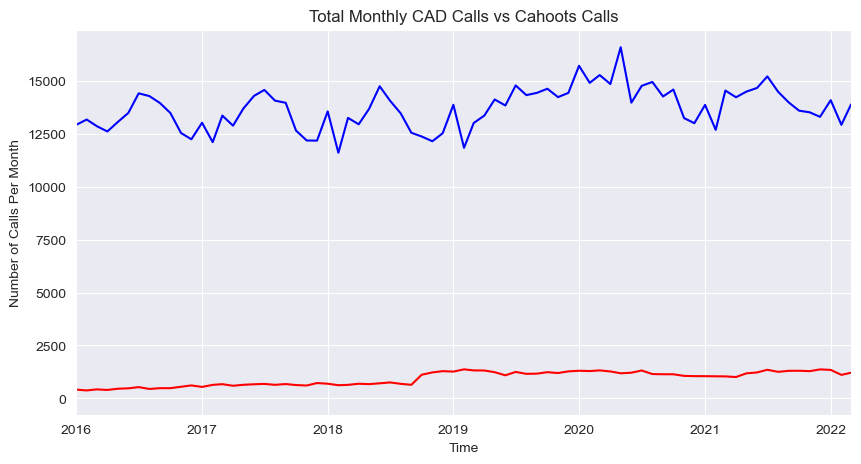

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Total Calls'], color='b')
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color='r')
plt.xlabel("Time")
plt.ylabel("Number of Calls Per Month")
plt.title("Total Monthly CAD Calls vs Cahoots Calls")
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

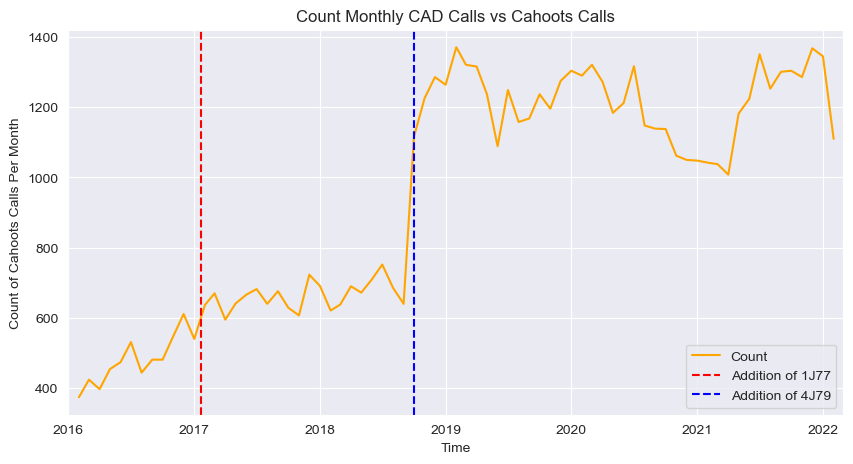

In [99]:
plt.figure(figsize=(10, 5))
plt.plot(total_vs_cahoot["Call Time"], total_vs_cahoot['Cahoots Calls'], color="orange", label="Count")
plt.ylabel("Count of Cahoots Calls Per Month")
plt.xlabel("Time")
plt.title("Count Monthly CAD Calls vs Cahoots Calls")
plt.axvline(pd.to_datetime(call_sign_times['1J77']['First']), label='Addition of 1J77', color='r', linestyle='--')
plt.axvline(pd.to_datetime(call_sign_times['4J79']['First']), label='Addition of 4J79', color='b', linestyle='--')
plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])
plt.legend(loc='lower right')

In [87]:
total_vs_3J78 = calculate_counts(clean_data, ['3J78'])
total_vs_1J77 = calculate_counts(clean_data, ['1J77'])
total_vs_4J79 = calculate_counts(clean_data, ['4J79'])
total_vs_4J79

,Call Time,Non Cahoots Calls,Cahoots Calls,Total Calls
33,2018-10-01,11915.0,465.0,12380
34,2018-11-01,11637.0,519.0,12156
35,2018-12-01,12016.0,518.0,12534
36,2019-01-01,13350.0,530.0,13880
37,2019-02-01,11256.0,590.0,11846
38,2019-03-01,12453.0,563.0,13016
39,2019-04-01,12798.0,573.0,13371
40,2019-05-01,13598.0,533.0,14131
41,2019-06-01,13365.0,481.0,13846
42,2019-07-01,14259.0,535.0,14794


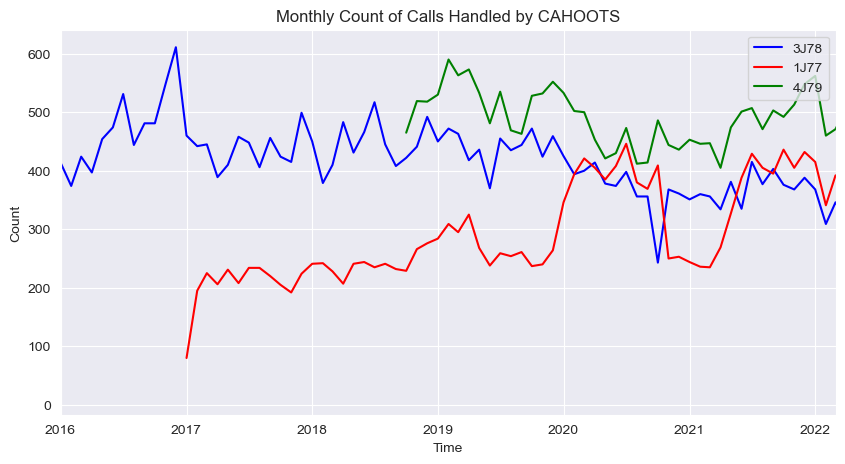

In [88]:
plt.figure(figsize=(10, 5))  # Set the figure size

plt.plot(total_vs_3J78['Call Time'], total_vs_3J78['Cahoots Calls'], label="3J78", color='b')
plt.plot(total_vs_1J77['Call Time'], total_vs_1J77['Cahoots Calls'], label="1J77", color='r')
plt.plot(total_vs_4J79['Call Time'], total_vs_4J79['Cahoots Calls'], label="4J79", color='g')

plt.title('Monthly Count of Calls Handled by CAHOOTS')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.grid(True)  # Turn on the grid
plt.legend(loc='upper right')

plt.xlim([pd.to_datetime("2016"), pd.to_datetime("2022-3-1")])

plt.show()

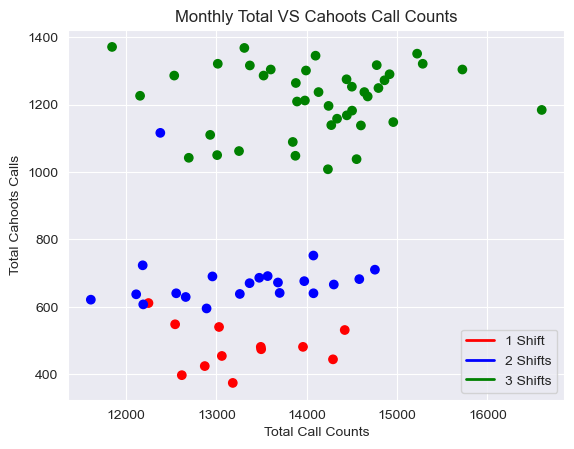

In [93]:


time_ranges = [
    (pd.Timestamp(first_3J78), pd.Timestamp(first_1J77), 'red'),
    (pd.Timestamp(first_1J77 ), pd.Timestamp(first_4J79), 'blue'),
    (pd.Timestamp(first_4J79), pd.Timestamp(last_1J77), 'green'),
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start <= call_time < end:
            return color
    return None  # Default color if no range is matched

# Apply the function to create a color column
total_vs_cahoot['Color'] = total_vs_cahoot['Call Time'].apply(lambda x: assign_color(x, time_ranges))
total_vs_cahoot = total_vs_cahoot.dropna(subset=['Color'])


plt.scatter(total_vs_cahoot['Total Calls'], total_vs_cahoot['Cahoots Calls'], c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")

custom_handles = [plt.Line2D([0], [0], color='red', lw=2, label='1 Shift'),
                  plt.Line2D([0], [0], color='blue', lw=2, label='2 Shifts'),
                  plt.Line2D([0], [0], color='green', lw=2, label='3 Shifts')]

plt.legend(handles=custom_handles, loc='lower right')

total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.show()


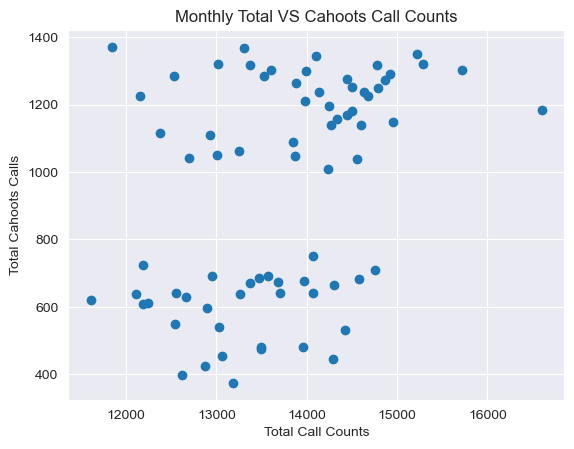

In [102]:


time_ranges = [
    (pd.Timestamp(first_3J78), pd.Timestamp(first_1J77), 'red'),
    (pd.Timestamp(first_1J77 ), pd.Timestamp(first_4J79), 'blue'),
    (pd.Timestamp(first_4J79), pd.Timestamp(last_1J77), 'green'),
]

# Function to assign colors based on time ranges
def assign_color(call_time, ranges):
    for start, end, color in ranges:
        if start <= call_time < end:
            return color
    return None  # Default color if no range is matched

# Apply the function to create a color column
total_vs_cahoot['Color'] = total_vs_cahoot['Call Time'].apply(lambda x: assign_color(x, time_ranges))
total_vs_cahoot = total_vs_cahoot.dropna(subset=['Color'])


plt.scatter(total_vs_cahoot['Total Calls'], total_vs_cahoot['Cahoots Calls']) #, c=total_vs_cahoot["Color"])
plt.xlabel("Total Call Counts")
plt.ylabel("Total Cahoots Calls")
plt.title("Monthly Total VS Cahoots Call Counts")



# plt.legend(handles=custom_handles, loc='lower right')

total_vs_cahoot = total_vs_cahoot[:-1] # (Dropping a value that obscures the results)
plt.show()


In [90]:
# clean_data["Call Sign Letter"] = clean_data["Call Sign"].str[1]
call_dispatch_count = clean_data.groupby(['Call Sign', "Reason for Dispatch"]).count().reset_index()
call_dispatch_count.rename(columns={'Unnamed: 0': 'Count'}, inplace=True)
call_dispatch_count = call_dispatch_count[["Call Sign", "Reason for Dispatch", "Count"]]
# call_dispatch_pivot = pd.pivot_table(call_dispatch_count, values='Unnamed: 0', index='Call Sign Letter', columns='Reason for Dispatch', aggfunc='sum').reset_index()
# call_dispatch_pivot
top_three_per_reason = call_dispatch_count.sort_values(["Call Sign", 'Count'], ascending=[True, False])
# call_dispatch_count
top_three_per_reason

,Call Sign,Reason for Dispatch,Count
5,&,THEFT FROM VEHICLE,10
4,&,THEFT,5
1,&,CRIMINAL MISCHIEF,2
2,&,FRAUD,2
0,&,BURGLARY,1
...,...,...,...
48783,Z999,LOST PROPERTY,2
48786,Z999,THEFT OF GUN,2
48781,Z999,CRIMINAL MISCHIEF,1
48782,Z999,FRAUD,1
